## Bioinformatics - Data Collection and Pre-Processing

In [1]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [2]:
target = new_client.target
target_query = target.search('CHEMBL4822')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Beta-secretase_1', 'xref_name': ...",Homo sapiens,Beta-secretase 1,14.0,False,CHEMBL4822,"[{'accession': 'P56817', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Beta-secretase (BACE),12.0,False,CHEMBL2111390,"[{'accession': 'Q9Y5Z0', 'component_descriptio...",PROTEIN FAMILY,9606


In [3]:
selected_target = targets.target_chembl_id[0] # retrieve bioactivity data reported as IC50 values
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [4]:
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,78857,[],CHEMBL653511,Inhibitory activity against Beta-secretase 1 w...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,413.0
1,None,None,391560,[],CHEMBL653332,Compound was tested for its inhibitory activit...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,0.002
2,None,None,391983,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,0.46
3,None,None,395858,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,9.0
4,None,None,395859,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10614,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890923,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158468,Inhibition of BACE1 (unknown origin) using Mca...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,775.0
10615,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890924,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158468,Inhibition of BACE1 (unknown origin) using Mca...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,1031.0
10616,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890925,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158468,Inhibition of BACE1 (unknown origin) using Mca...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,828.0
10617,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24963344,[],CHEMBL5216426,Inhibition of BACE1 (unknown origin) using A-b...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,15.1


In [5]:
df.to_csv('data/bioactivity_raw.csv',index=False)

### Handling missing data

In [6]:
import pandas as pd
df = pd.read_csv('data/bioactivity_raw.csv',dtype = {'Canonical_smiles':str})

In [7]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,78857,[],CHEMBL653511,Inhibitory activity against Beta-secretase 1 w...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,413.000
1,NaN,NaN,391560,[],CHEMBL653332,Compound was tested for its inhibitory activit...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.002
2,NaN,NaN,391983,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.460
3,NaN,NaN,395858,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,9.000
4,NaN,NaN,395859,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,5.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10614,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24890923,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158468,Inhibition of BACE1 (unknown origin) using Mca...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,775.000
10615,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24890924,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158468,Inhibition of BACE1 (unknown origin) using Mca...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,1031.000
10616,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24890925,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158468,Inhibition of BACE1 (unknown origin) using Mca...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,828.000
10617,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24963344,[],CHEMBL5216426,Inhibition of BACE1 (unknown origin) using A-b...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,15.100


In [8]:
df2 = df[df.standard_value.notna()]
df2 = df2[df2.canonical_smiles.notna()]
print(f"The shape for df1 and df2 are {df.shape} and {df2.shape}")

The shape for df1 and df2 are (10619, 46) and (10472, 46)


In [9]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3.reset_index(drop=True, inplace=True)
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0
...,...,...,...
10467,CHEMBL5192597,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccc(O)cc1)N(...,775.0
10468,CHEMBL5184180,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,1031.0
10469,CHEMBL5184529,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,828.0
10470,CHEMBL5220695,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,15.1


In [10]:
df3.standard_value.describe()

count    1.047200e+04
mean     3.437005e+04
std      9.562719e+05
min      2.000000e-04
25%      2.500000e+01
50%      1.915000e+02
75%      2.296000e+03
max      8.600000e+07
Name: standard_value, dtype: float64

<Axes: ylabel='standard_value'>

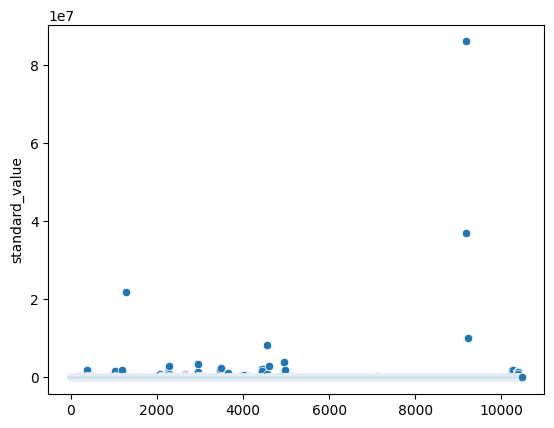

In [22]:
sns.scatterplot(x=df3.index, y='standard_value', data=df3)

In [25]:
high_IC50_rows = df3[df3['standard_value'] > 6000000].index
high_IC50_rows

Index([1280, 4562, 9181, 9183, 9229], dtype='int64')

In [26]:
df_final = df3[df3['standard_value'] <=6000000]
df_final

,molecule_chembl_id,canonical_smiles,standard_value,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0,6.337242
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0,5.045757
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0,5.251812
...,...,...,...,...
10467,CHEMBL5192597,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccc(O)cc1)N(...,775.0,6.110698
10468,CHEMBL5184180,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,1031.0,5.986741
10469,CHEMBL5184529,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,828.0,6.081970
10470,CHEMBL5220695,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,15.1,7.821023


In [27]:
import numpy as np
def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', axis = 1)
        
    return x

In [28]:
df_final = pIC50(df_final)
df_final

/var/folders/pj/44_k69r55f7c8lndy32p_y1m0000gn/T/ipykernel_59286/2493827041.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['pIC50'] = pIC50


,molecule_chembl_id,canonical_smiles,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,6.337242
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,5.045757
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5.251812
...,...,...,...
10467,CHEMBL5192597,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccc(O)cc1)N(...,6.110698
10468,CHEMBL5184180,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,5.986741
10469,CHEMBL5184529,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,6.081970
10470,CHEMBL5220695,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,7.821023


In [29]:
df_final.pIC50.describe()

count    10467.000000
mean         6.590422
std          1.348690
min          2.397940
25%          5.643210
50%          6.718967
75%          7.602060
max         12.698970
Name: pIC50, dtype: float64

In [30]:
df_final.to_csv('data/Preprocessed_10467x3.csv',index=False)

## Dataset Preparation

In [31]:
import pandas as pd
df = pd.read_csv('data/Preprocessed_10467x3.csv')
df

,molecule_chembl_id,canonical_smiles,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,6.337242
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,5.045757
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5.251812
...,...,...,...
10462,CHEMBL5192597,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccc(O)cc1)N(...,6.110698
10463,CHEMBL5184180,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,5.986741
10464,CHEMBL5184529,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,6.081970
10465,CHEMBL5220695,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,7.821023


In [32]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [33]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-07-24 23:31:04--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-07-24 23:31:05--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8003::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: 'padel.zip'

padel.zip           100%[===================>]  24.57M  27.5MB/s    in 0.9s    

2023-07-24 23:31:07 (27.5 MB/s) - 'padel.zip' saved [25768637/25768637]

--2023-07-24 23:31:07-

In [34]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [35]:
! bash padel.sh

Processing CHEMBL406146 in molecule.smi (1/10467). 
Processing CHEMBL78946 in molecule.smi (2/10467). 
Processing CHEMBL324109 in molecule.smi (3/10467). 
Processing CHEMBL114147 in molecule.smi (4/10467). 
Processing CHEMBL419949 in molecule.smi (5/10467). 
Processing CHEMBL116826 in molecule.smi (6/10467). 
Processing CHEMBL143239 in molecule.smi (7/10467). 
Processing CHEMBL332948 in molecule.smi (8/10467). 
Processing CHEMBL51386 in molecule.smi (9/10467). Average speed: 5.14 s/mol.
Processing CHEMBL332260 in molecule.smi (10/10467). Average speed: 2.58 s/mol.
Processing CHEMBL332260 in molecule.smi (11/10467). Average speed: 1.75 s/mol.
Processing CHEMBL2370886 in molecule.smi (12/10467). Average speed: 1.32 s/mol.
Processing CHEMBL142715 in molecule.smi (13/10467). Average speed: 1.06 s/mol.
Processing CHEMBL326488 in molecule.smi (14/10467). Average speed: 0.90 s/mol.
Processing CHEMBL290001 in molecule.smi (15/10467). Average speed: 0.78 s/mol.
Processing CHEMBL51386 in molecul

In [36]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X.to_csv('data/descriptors.csv',index=False)
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL324109,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL116826,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL78946,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL332948,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL114147,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10462,CHEMBL5192597,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10463,CHEMBL5219239,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10464,CHEMBL5188873,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10465,CHEMBL5184180,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10462,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10463,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10464,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10465,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df3_X.to_csv('data/Xdata_10467x881.csv',index = False)

In [232]:
df3_Y = pd.read_csv('data/Ydata_11855.csv')
df3_Y

,logPotency
0,5.52
1,4.62
2,5.57
3,5.42
4,5.82
...,...
11850,5.22
11851,4.37
11852,4.62
11853,4.47


In [233]:
df3_Y = df3_Y.drop(high_logPotency_rows)
df3_Y.describe()

,logPotency
count,11841.00
mean,4.39
std,0.46
min,3.70
25%,4.05
50%,4.27
75%,4.50
max,7.00


In [234]:
df3_Y.to_csv('data/Ydata_11841.csv',index = False)

## Model Comparisons

In [235]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import pickle

In [238]:
X = pd.read_csv('data/Xdata_11841x881.csv')
Y = pd.read_csv('data/Ydata_11841.csv')

In [239]:
# Removing low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=0.02)
X = selection.fit(X)
len(list(selection.get_feature_names_out()))

436

In [240]:
features_list = list(selection.get_feature_names_out())

In [241]:
X = pd.read_csv('data/Xdata_11841x881.csv')
selection = VarianceThreshold(threshold=0.02)
X = selection.fit_transform(X)

In [242]:
X = pd.read_csv('data/Xdata_11841x881.csv')
X = X[features_list]
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,...,PubchemFP813,PubchemFP818,PubchemFP819,PubchemFP820,PubchemFP821,PubchemFP822,PubchemFP824,PubchemFP826,PubchemFP830,PubchemFP833
0,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,1,1,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,1,1,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836,1,0,1,1,1,1,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
11837,1,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
11838,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
11839,0,0,1,1,0,0,1,1,1,0,...,0,0,1,0,1,0,1,0,0,0


<Axes: >

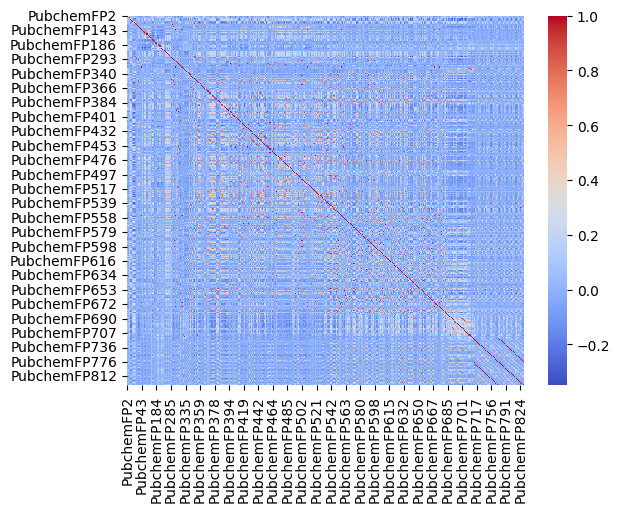

In [243]:
# Create a correlation matrix
X_corr = pd.DataFrame(X)
corr_matrix = X_corr.corr()

# Print the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm')

In [244]:
corr_matrix
corr_matrix.to_csv('data/corr_matrix_436.csv')

In [245]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
len(to_drop)
# X_corrdel = X_corr.drop(to_drop, axis=1)
# #X_corrdel.to_csv('data/Xdata_correlationdropped_7546x129.csv')
# X_corrdel.shape

237

In [246]:
df_final = X.drop(to_drop,axis=1)
df_final

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,...,PubchemFP749,PubchemFP750,PubchemFP755,PubchemFP756,PubchemFP757,PubchemFP758,PubchemFP759,PubchemFP763,PubchemFP767,PubchemFP770
0,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836,1,0,1,1,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
11837,1,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
11838,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11839,0,0,1,1,0,0,1,1,1,0,...,0,0,0,1,0,1,0,0,0,0


In [247]:
df_final.to_csv('data/XdataFinal_11841x199.csv',index = False)

In [248]:
selected_features = df_final.columns.tolist()
len(selected_features)

199

In [249]:
pickle.dump((selected_features),open('data/selected_features.pkl','wb'))

## Regressor Model Training

In [250]:
X = pd.read_csv('data/XdataFinal_11841x199.csv')
X.shape

(11841, 199)

In [251]:
X = X.to_numpy()
print(X.shape)
print(type(X))

(11841, 199)
<class 'numpy.ndarray'>


In [254]:
Y = pd.read_csv('data/Ydata_11841.csv')
Y = Y.logPotency
print(Y.shape)
print(type(Y))

(11841,)
<class 'pandas.core.series.Series'>


In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [256]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [02:24<00:00,  3.43s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [02:03<00:00,  2.95s/it]


In [257]:
models_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.91,0.91,0.14,0.30
ExtraTreeRegressor,0.91,0.91,0.14,0.31
ExtraTreesRegressor,0.91,0.91,0.14,15.66
GaussianProcessRegressor,0.91,0.91,0.14,21.11
MLPRegressor,0.84,0.84,0.19,7.44
RandomForestRegressor,0.78,0.78,0.22,10.83
BaggingRegressor,0.72,0.73,0.24,1.19
XGBRegressor,0.59,0.60,0.29,1.39
NuSVR,0.37,0.39,0.36,18.84


In [258]:
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GammaRegressor,-0.08,0.01,0.47,0.10
TweedieRegressor,-0.08,0.01,0.47,0.35
PoissonRegressor,-0.08,0.01,0.47,0.14
BayesianRidge,-0.09,0.00,0.47,0.89
OrthogonalMatchingPursuit,-0.09,0.00,0.47,0.04
LassoCV,-0.09,0.00,0.47,1.28
ElasticNetCV,-0.09,0.00,0.47,1.08
LassoLarsCV,-0.09,0.00,0.47,0.41
LarsCV,-0.09,0.00,0.47,0.47


## Artificial Neural Network

In [190]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Lambda
from tensorflow.keras import regularizers
from keras.optimizers.legacy import Adam,Adagrad,Adamax
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [259]:
X = pd.read_csv('data/XdataFinal_11841x199.csv')
X = X.to_numpy()
Y = pd.read_csv('data/Ydata_11841.csv')
Y = Y.logPotency

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=30)

In [261]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(X_test.shape)

(11841, 199)
(11841,)
(9472, 199)
(2369, 199)


In [270]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(199,), kernel_regularizer=regularizers.l2(0.01))) # reduced regularization
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # reduced regularization
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))  # changed activation function
optimizer = Adamax(learning_rate=0.0001)
model.compile(loss="mean_absolute_error", optimizer=optimizer, metrics=['mae'])  # use the instantiated optimizer

history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# The rest of the code remains the same...

Epoch 1/100
948/948 [==============================] - 2s 2ms/step - loss: 5.9885 - mae: 0.7390 - val_loss: 5.1244 - val_mae: 0.5011
Epoch 2/100
948/948 [==============================] - 2s 2ms/step - loss: 4.6958 - mae: 0.5130 - val_loss: 4.3184 - val_mae: 0.5355
Epoch 3/100
948/948 [==============================] - 2s 2ms/step - loss: 3.9317 - mae: 0.4734 - val_loss: 3.8333 - val_mae: 0.6756
Epoch 4/100
948/948 [==============================] - 2s 2ms/step - loss: 3.3567 - mae: 0.4538 - val_loss: 3.3974 - val_mae: 0.7330
Epoch 5/100
948/948 [==============================] - 2s 2ms/step - loss: 2.8920 - mae: 0.4302 - val_loss: 3.0601 - val_mae: 0.7900
Epoch 6/100
948/948 [==============================] - 2s 2ms/step - loss: 2.5316 - mae: 0.4257 - val_loss: 2.5842 - val_mae: 0.6350
Epoch 7/100
948/948 [==============================] - 2s 2ms/step - loss: 2.2279 - mae: 0.4162 - val_loss: 2.3024 - val_mae: 0.6208
Epoch 8/100
948/948 [==============================] - 2s 2ms/step - 

75/75 [==============================] - 0s 718us/step - loss: 0.3283 - mae: 0.3192


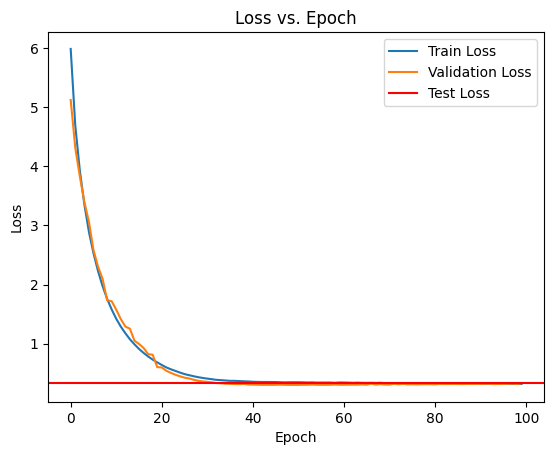

In [271]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
test_loss = model.evaluate(X_test, y_test)[0]
plt.axhline(y=test_loss, color='r', linestyle='-', label='Test Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [272]:
y_pred = model.predict(X_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
# calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# print the test loss, test accuracy, and R-squared score
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
print('R-squared score:', r2)

75/75 [==============================] - 0s 779us/step - loss: 0.3283 - mae: 0.3192
Test loss: 0.3283124268054962
Test accuracy: 0.31923428177833557
R-squared score: -0.13974569292045036


In [273]:
y_train_predicted = model.predict(X_train)
y_train_predicted

  1/296 [..............................] - ETA: 4s

296/296 [==============================] - 0s 622us/step


array([[4.1455345],
       [4.174358 ],
       [4.219942 ],
       ...,
       [4.2486644],
       [4.2802176],
       [4.219007 ]], dtype=float32)

In [266]:
y_pred

array([[4.2557945],
       [4.2631426],
       [4.276496 ],
       ...,
       [4.269802 ],
       [4.242008 ],
       [4.2681603]], dtype=float32)

75/75 [==============================] - 0s 395us/step


<Axes: ylabel='logPotency'>

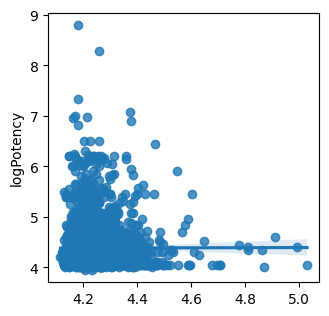

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt
y_predicted = model.predict(X_test)
plt.figure(figsize=(3.5,3.5))
sns.regplot(x = y_predicted, y = y_test, fit_reg=True)

## Final Model saving

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
import numpy as np

In [17]:
X = pd.read_csv('data/Xdata_13699x881.csv')
Y = pd.read_csv('data/Ydata_13699.csv')

In [18]:
Y = Y.pIC50

In [19]:
selected_features = pickle.load(open("data/selected_features.pkl","rb"))
selected_features

['PubchemFP2',
 'PubchemFP3',
 'PubchemFP12',
 'PubchemFP13',
 'PubchemFP16',
 'PubchemFP17',
 'PubchemFP18',
 'PubchemFP19',
 'PubchemFP20',
 'PubchemFP23',
 'PubchemFP24',
 'PubchemFP25',
 'PubchemFP33',
 'PubchemFP37',
 'PubchemFP38',
 'PubchemFP43',
 'PubchemFP115',
 'PubchemFP143',
 'PubchemFP144',
 'PubchemFP150',
 'PubchemFP152',
 'PubchemFP157',
 'PubchemFP159',
 'PubchemFP179',
 'PubchemFP180',
 'PubchemFP185',
 'PubchemFP186',
 'PubchemFP187',
 'PubchemFP192',
 'PubchemFP193',
 'PubchemFP194',
 'PubchemFP199',
 'PubchemFP206',
 'PubchemFP256',
 'PubchemFP258',
 'PubchemFP259',
 'PubchemFP260',
 'PubchemFP261',
 'PubchemFP299',
 'PubchemFP300',
 'PubchemFP301',
 'PubchemFP305',
 'PubchemFP308',
 'PubchemFP333',
 'PubchemFP334',
 'PubchemFP335',
 'PubchemFP338',
 'PubchemFP339',
 'PubchemFP340',
 'PubchemFP341',
 'PubchemFP345',
 'PubchemFP346',
 'PubchemFP349',
 'PubchemFP352',
 'PubchemFP356',
 'PubchemFP357',
 'PubchemFP359',
 'PubchemFP364',
 'PubchemFP365',
 'PubchemFP366'

In [20]:
X = X[selected_features]
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP23,...,PubchemFP734,PubchemFP737,PubchemFP749,PubchemFP750,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP759,PubchemFP763,PubchemFP839
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13694,1,0,1,0,1,0,1,1,0,1,...,0,1,0,0,0,0,1,1,0,0
13695,1,0,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
13696,1,0,1,0,1,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
13697,1,0,1,0,1,0,1,1,0,1,...,0,1,0,0,0,0,1,0,0,0


In [21]:
X = X.to_numpy()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 0, 0]])

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [22]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(165,)))
model.add(Dense(128, activation='relu',kernel_regularizer = regularizers.l2(0.0525)))
model.add(Dense(1, activation='relu'))
model.compile(loss="mean_absolute_error", optimizer = 'adam',metrics=['mae'])

In [23]:
model.fit(X,Y, epochs = 50, batch_size = 6)

Epoch 1/50
2284/2284 [==============================] - 1s 431us/step - loss: 1.3334 - mae: 1.0027
Epoch 2/50
2284/2284 [==============================] - 1s 424us/step - loss: 0.9397 - mae: 0.9028
Epoch 3/50
2284/2284 [==============================] - 1s 425us/step - loss: 0.8942 - mae: 0.8602
Epoch 4/50
2284/2284 [==============================] - 1s 419us/step - loss: 0.8658 - mae: 0.8346
Epoch 5/50
2284/2284 [==============================] - 1s 422us/step - loss: 0.8441 - mae: 0.8148
Epoch 6/50
2284/2284 [==============================] - 1s 436us/step - loss: 0.8232 - mae: 0.7960
Epoch 7/50
2284/2284 [==============================] - 1s 411us/step - loss: 0.8149 - mae: 0.7885
Epoch 8/50
2284/2284 [==============================] - 1s 435us/step - loss: 0.7980 - mae: 0.7723
Epoch 9/50
2284/2284 [==============================] - 1s 426us/step - loss: 0.7914 - mae: 0.7663
Epoch 10/50
2284/2284 [==============================] - 1s 425us/step - loss: 0.7788 - mae: 0.7543
Epoch 11/

In [25]:
model.save('data/my_model.keras')

In [215]:
y_pred = model.predict(X_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
# calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# print the test loss, test accuracy, and R-squared score
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
print('R-squared score:', r2)

86/86 [==============================] - 0s 368us/step - loss: 0.8014 - mae: 0.7800
Test loss: 0.8013732433319092
Test accuracy: 0.7799758315086365
R-squared score: 0.33038555915184464


In [216]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(165,)))
model.add(Dense(128, activation='relu',kernel_regularizer = regularizers.l2(0.0525)))
model.add(Dense(1, activation='relu'))
model.compile(loss="mean_absolute_error", optimizer = 'adam',metrics=['mae'])

In [217]:
model.fit(X,Y, epochs = 50, batch_size = 6)

Epoch 1/50
2284/2284 [==============================] - 1s 425us/step - loss: 1.3137 - mae: 0.9919
Epoch 2/50
2284/2284 [==============================] - 1s 420us/step - loss: 0.9314 - mae: 0.8948
Epoch 3/50
2284/2284 [==============================] - 1s 427us/step - loss: 0.8922 - mae: 0.8594
Epoch 4/50
2284/2284 [==============================] - 1s 420us/step - loss: 0.8578 - mae: 0.8270
Epoch 5/50
2284/2284 [==============================] - 1s 413us/step - loss: 0.8378 - mae: 0.8100
Epoch 6/50
2284/2284 [==============================] - 1s 463us/step - loss: 0.8220 - mae: 0.7956
Epoch 7/50
2284/2284 [==============================] - 1s 432us/step - loss: 0.8139 - mae: 0.7888
Epoch 8/50
2284/2284 [==============================] - 1s 420us/step - loss: 0.7952 - mae: 0.7707
Epoch 9/50
2284/2284 [==============================] - 1s 416us/step - loss: 0.7856 - mae: 0.7613
Epoch 10/50
2284/2284 [==============================] - 1s 416us/step - loss: 0.7770 - mae: 0.7539
Epoch 11/

In [218]:
pickle.dump((model),open('data/trained_model.pkl','wb'))